## 1. Import libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

## 2. Read the dataset:

In [2]:
data = pd.read_csv("Electric_Vehicle_Population_Data.csv")
data.head(1)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10


## 3. EDA:

#### Checking the null values:

In [3]:
data.isna().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

There are numerous ways to handle the NULL data but for this case we will drop them.

In [4]:
data = data.dropna()
data.isna().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

#### Column data types:

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177473 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177473 non-null  object 
 1   County                                             177473 non-null  object 
 2   City                                               177473 non-null  object 
 3   State                                              177473 non-null  object 
 4   Postal Code                                        177473 non-null  float64
 5   Model Year                                         177473 non-null  int64  
 6   Make                                               177473 non-null  object 
 7   Model                                              177473 non-null  object 
 8   Electric Vehicle Type                              177473 non-null  object

## 4. Analyzing the data:

### 4.1 Increament in EV by the year:

In [6]:
ev_reg_by_year = data['Model Year'].value_counts().sort_index()
dates = list(range(min(ev_reg_by_year.index), max(ev_reg_by_year.index)+1))

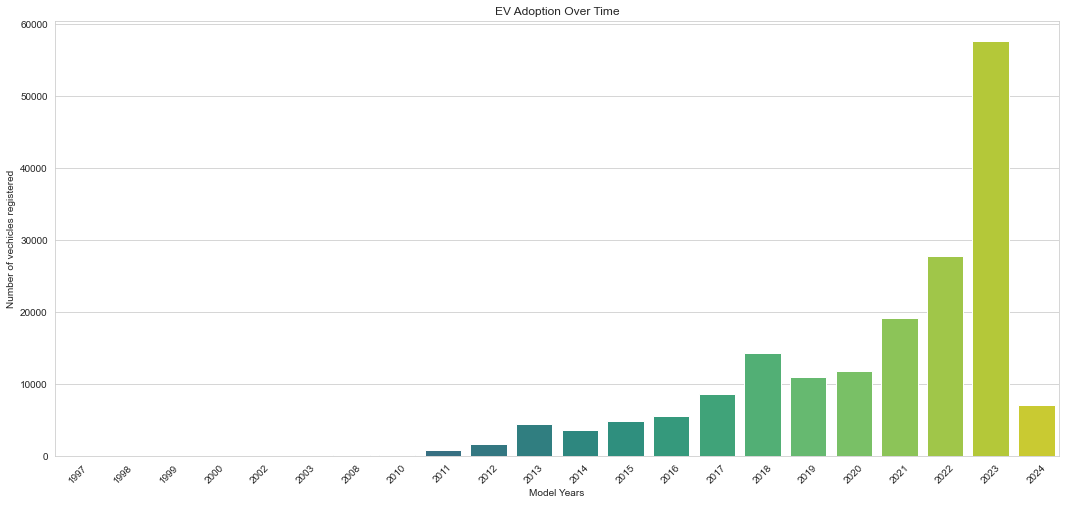

In [7]:
sns.set_style("whitegrid")
plt.figure(figsize=(18, 8))
sns.barplot(x=ev_reg_by_year.index, y=ev_reg_by_year.values, palette='viridis')
plt.xlabel("Model Years")
plt.xticks(rotation='45')
plt.ylabel("Number of vechicles registered")
plt.title("EV Adoption Over Time")
plt.show()

There seems to be a gradual increment in the registration of the EV with 2023 being the highest. This dataset only contains
a few records for the year 2024, so the bar chart seems small.

### 4.2 EV based on the counties and cities:

In [46]:
# Top 3 Counties based on the EV registration count:
ev_county_distribtution = data['County'].value_counts()
top_3_county = ev_county_distribtution.head(3).index


# Data related to these top counties:
top_counties_data = data[data['County'].isin(top_3_county)]


ev_city_distribution = top_counties_data.groupby(['County', 'City']).size().sort_values(ascending=False).reset_index(name='Number of EVs')
top_10_cities = ev_city_distribution.head(10)

In [47]:
top_10_cities

,County,City,Number of EVs
0,King,Seattle,29447
1,King,Bellevue,8930
2,King,Redmond,6478
3,King,Kirkland,5362
4,King,Sammamish,5280
5,King,Renton,4980
6,Snohomish,Bothell,4663
7,Pierce,Tacoma,3722
8,King,Tukwila,2927
9,King,Kent,2782


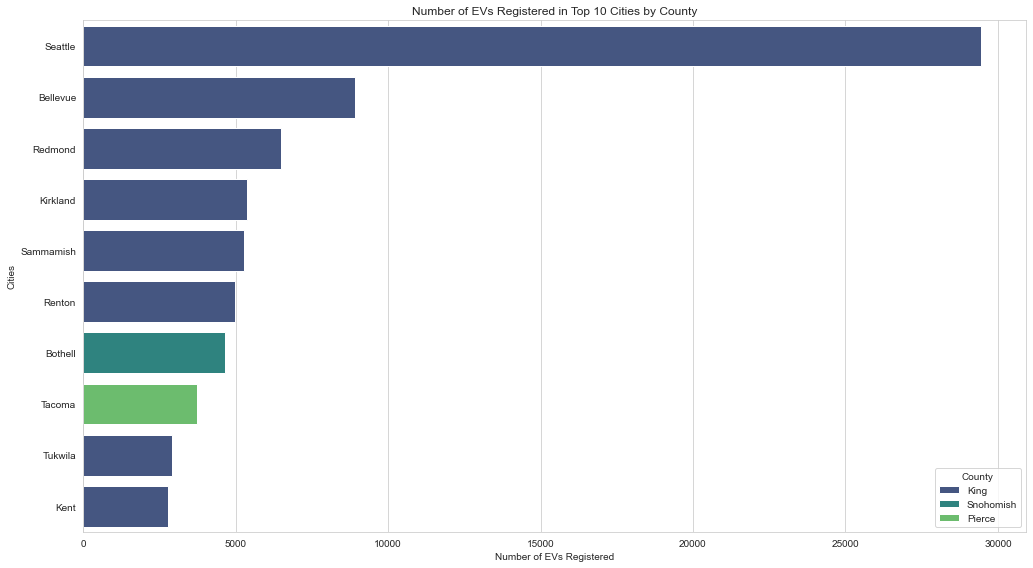

In [77]:
plt.figure(figsize=(17, 8))
sns.barplot(
    x='Number of EVs', 
    y='City', 
    hue='County',  
    data=top_10_cities, 
    palette='viridis', 
    dodge=False  # Ensures bars are stacked and wider
)

plt.xlabel("Number of EVs Registered")
plt.ylabel("Cities")
plt.title("Number of EVs Registered in Top 10 Cities by County")


plt.legend(title="County")


plt.tight_layout(rect=[0, 0, 0.85, 1])  

plt.show()